<a href="https://colab.research.google.com/github/Deeksha-coder-debug/ML-Projects/blob/main/Decision_Tree_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
data=load_iris()
X=data.data
y=data.target

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=99)

In [6]:
# creating object for decision tree
clf=DecisionTreeClassifier(random_state=1)

In [7]:
#### training the model
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [9]:
# Apply the predict method to the test data and
# use the trained model to create predictions.
y_pred=clf.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy : {accuracy}')

Accuracy : 0.9555555555555556


In [10]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'max_depth':range(1,10,1),
    'min_samples_leaf':range(1,20,2),
    'min_samples_split':range(2,20,2),
    'criterion':['entropy','gini']
}

tree=DecisionTreeClassifier(random_state=1)

grid_search=GridSearchCV(estimator=tree,param_grid=param_grid,cv=5,verbose=True)
grid_search.fit(X_train,y_train)

print('best accuracy',grid_search.best_score_)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits
best accuracy 0.9714285714285715
DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=3,
                       random_state=1)


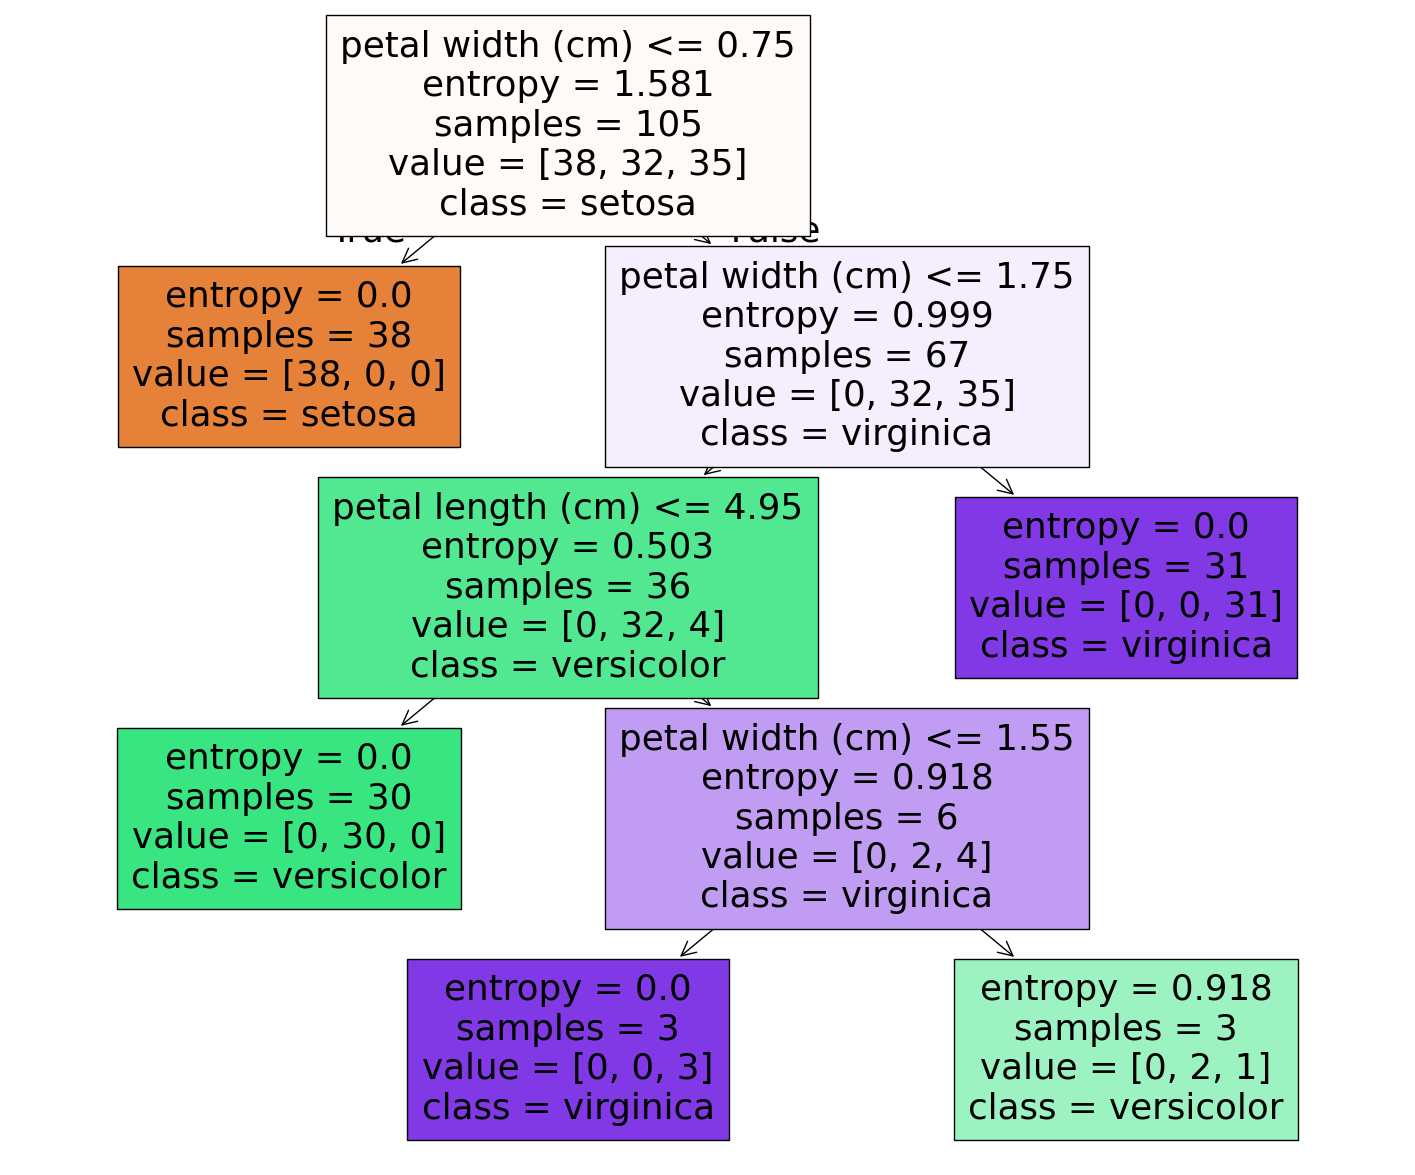

In [13]:
# Visualizing the Decision Tree Classifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

tree_clf=grid_search.best_estimator_

plt.figure(figsize=(18,15))
plot_tree(tree_clf,filled=True,feature_names=data.feature_names,class_names=data.target_names)
plt.show()

In [15]:
# Starting with Decision Tree Regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor,export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

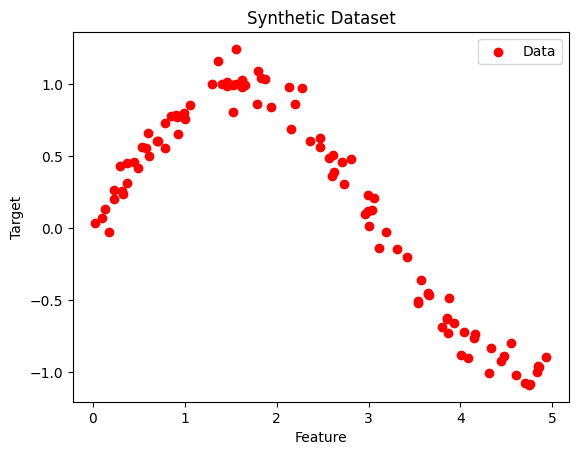

In [17]:
np.random.seed(42)
X=np.sort(5*np.random.rand(100,1),axis=0)
y=np.sin(X).ravel()+np.random.normal(0,0.1,X.shape[0])

plt.scatter(X,y,color='red',label='Data')
plt.title('Synthetic Dataset')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [22]:
# define the max_depth as 4 which controls the
# maximum levels a tree can reach , controlling model complexity.
regressor=DecisionTreeRegressor(max_depth=4,random_state=42)

In [24]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [28]:
y_pred=regressor.predict(X_test)

mse=mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error : {mse:.4f}")

Mean Squared Error : 0.0151


/tmp/ipython-input-4102811498.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid=np.arange(min(X),max(X),0.01)[:,np.newaxis]


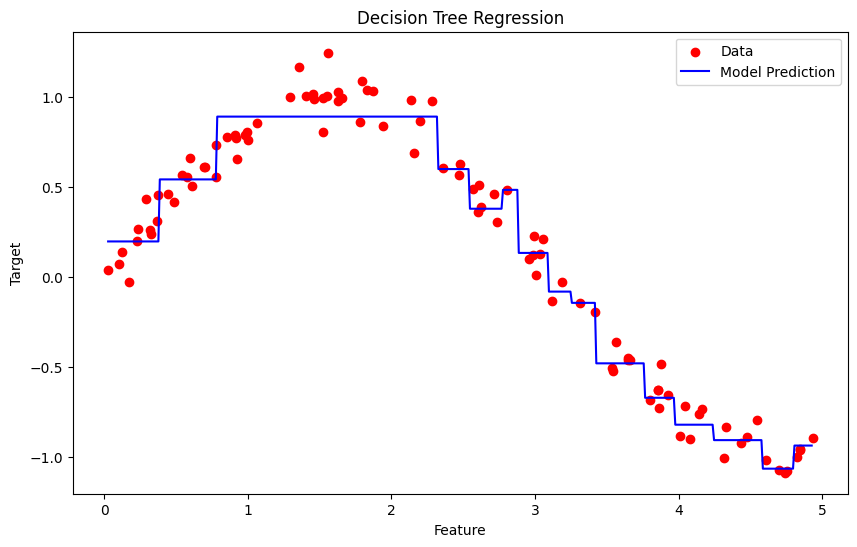

In [30]:
X_grid=np.arange(min(X),max(X),0.01)[:,np.newaxis]
y_grid_pred=regressor.predict(X_grid)

plt.figure(figsize=(10,6))
plt.scatter(X,y,color='red',label='Data')
plt.plot(X_grid,y_grid_pred,color='blue',label="Model Prediction")
plt.title('Decision Tree Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

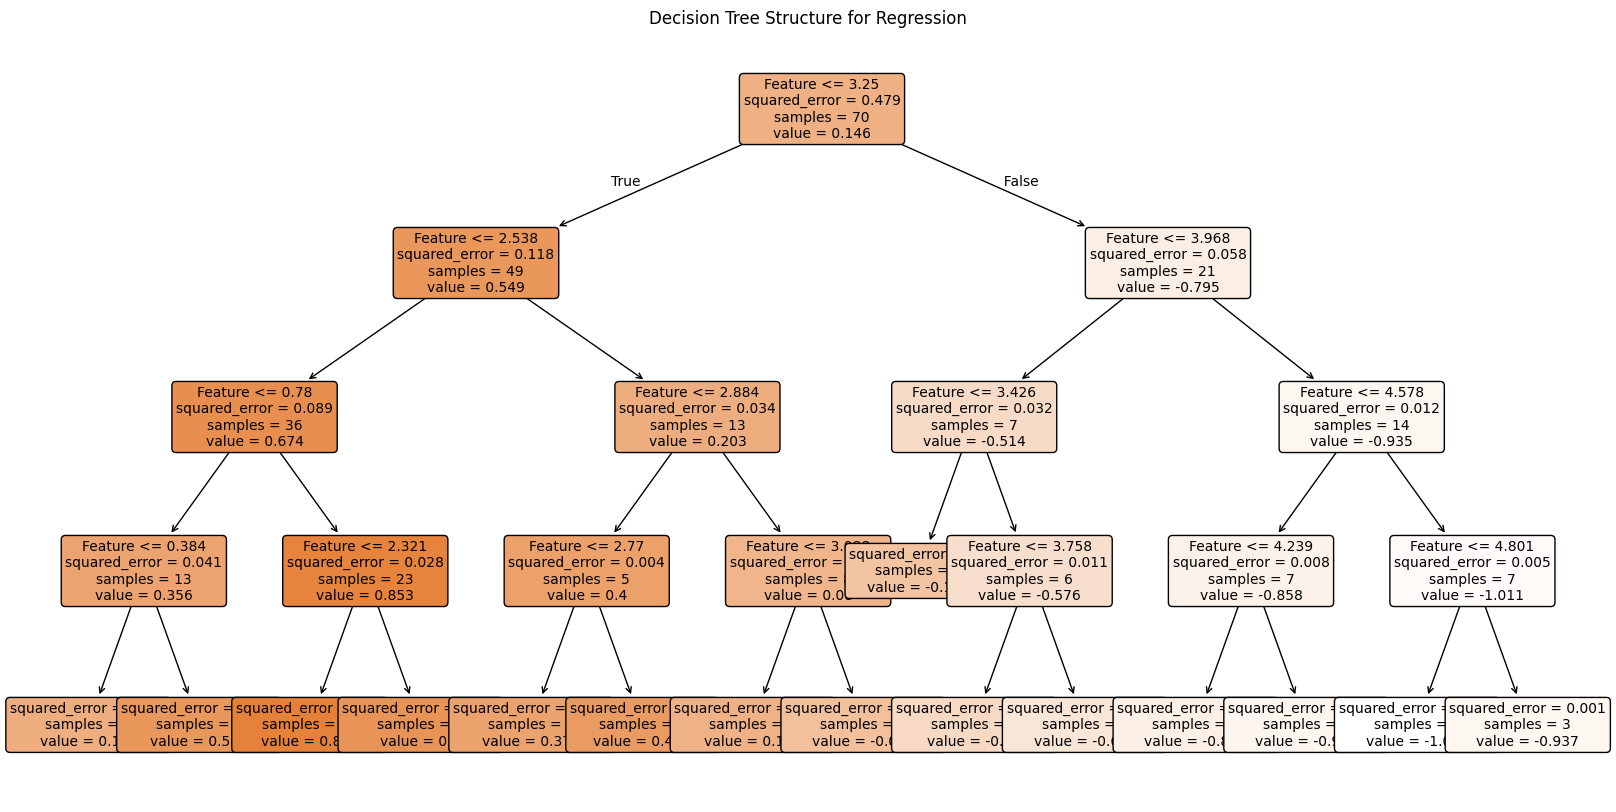

In [31]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(regressor,feature_names=['Feature'],filled=True,rounded=True,fontsize=10)
plt.title('Decision Tree Structure for Regression')
plt.show()